# Integrated Project: Data Cleaning & Feature Engineering

## 1. Introduction

### Insurance Industry in Africa 
- Africa is home to 17% of the world's population.
- In 2017 it was estimated that the total value of insurance premiums was 45 billion U.S.
- The insurance industry in Africa only represents >1% of insured catastrophe losses worldwide.

### Observations
Let’s look into the market to understand what the problems are, so that we can define a problem statement and come up with a viable tool that can bring value to the industry.

1.	Affordability
- 25 dollar a day -> That a simple cheese burger in McDonalds
- 10 times Lower than other countries
- South Africa has the highest average salary $2088 ($70 / day)

2.	Insurance Knowledge
- Why should I spend my money now for a risk that might not happen?
- Who can I target and where?

3.	Target Marketing
- Africa has an unemployment rate of 30%.
- Less than 50% of the available market are below the
- Which client pool can be optimised

### Problem Statement
In the African insurance industry, the key challenges revolve around low affordability, limited insurance knowledge, and difficulties in identifying an optimal target market. With an average daily income significantly lower than other regions and a high unemployment rate, potential clients may find it hard to justify spending on insurance for potential risks. Additionally, a lack of awareness and understanding of insurance further hinders market penetration. The task is to develop a solution that addresses these issues, making insurance more affordable, enhancing knowledge about its importance, and identifying and optimizing the target market to maximize the industry's reach and impact in Africa.


## 2. Imports

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

from scipy import stats
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt

## 3. Load Data

In [3]:
file_path = "insurance_claims_raw.xlsx"
df = pd.read_excel(file_path)

## 4. Display Dataset

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


## 5. Data Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          998 non-null    float64       
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            998 non-null    float64       
 7   policy_annual_premium        997 non-null    float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

- The dataset contains 1000 entries.
- There are 40 columns with various data types, including integers, floats, objects (likely strings), and datetime objects.
- Some columns have missing values, as indicated by the difference in non-null counts.
- The _c39 column has all null values and can be considered for removal.

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,998.000000,1000.000000,998.000000,997.000000,1.000000e+03,1000.000000,998.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,996.000000,999.000000,999.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.962926,546238.648000,1134.268537,1257.001113,1.101000e+06,501214.488000,25176.452906,-26793.700000,11.644000,1.83900,0.992000,1.487000,52767.469880,7434.944945,7398.628629,37928.950000,2005.103000,NaN
std,115.113174,9.135425,257063.005276,611.251914,244.265051,2.297407e+06,71701.610941,27877.379027,28104.096686,6.951373,1.01888,0.820127,1.111335,26405.348039,4883.158265,4827.050887,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.000000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1090.320000,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.500000,4290.000000,4440.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.830000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,57935.000000,6780.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.740000,0.000000e+00,603251.000000,51075.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70620.000000,11310.000000,10890.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.000000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


- The mean, std (standard deviation), min, 25%, 50% (median), 75%, and max values are provided for each numeric column.

#### Observations:
- Some columns, like age, policy_deductable, policy_annual_premium, and others, have missing values that need to be addressed.
- Columns like capital-gains and capital-loss have negative values, which might be valid but need further investigation.
- The umbrella_limit column has a wide range of values, including negative values, which may need attention.
- The incident_hour_of_the_day column has values ranging from 0 to 23, indicating the hour of the day when an incident occurred.

# 5. Data Cleaning

### 5.1 Create Copy of Dataset

In [7]:
# Create copy of the DataFrame
df_copy = df.copy()

# Display the first few rows of the copied DataFrame to verify
df_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48.0,521585,2014-10-17,OH,250/500,1000.0,1406.91,0,466132,...,YES,71610.0,6510.0,13020.0,52080,Saab,92x,2004,Y,NaN
1,228,42.0,342868,2006-06-27,IN,250/500,2000.0,1197.22,5000000,468176,...,?,5070.0,780.0,780.0,3510,Mercedes,E400,2007,Y,NaN
2,134,29.0,687698,2000-09-06,OH,100/300,2000.0,1413.14,5000000,430632,...,NO,34650.0,7700.0,3850.0,23100,Dodge,RAM,2007,N,NaN
3,256,41.0,227811,1990-05-25,IL,250/500,2000.0,1415.74,6000000,608117,...,NO,63400.0,6340.0,6340.0,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44.0,367455,2014-06-06,IL,500/1000,1000.0,1583.91,6000000,610706,...,NO,6500.0,1300.0,650.0,4550,Accura,RSX,2009,N,NaN


### 5.2 Handling Missing Values

In [8]:
# Check for missing values in the DataFrame
missing_values = df_copy.isnull().sum()

# Display columns with missing values
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

age                         2
policy_deductable           2
policy_annual_premium       3
insured_hobbies             2
capital-gains               2
authorities_contacted       2
incident_state              2
total_claim_amount          4
injury_claim                1
property_claim              1
_c39                     1000
dtype: int64


In [9]:
# Remove rows with missing values above a certain threshold (20%)
threshold = 0.2 * len(df_copy)
df_copy = df_copy.dropna(thresh = threshold, axis = 1)

In [10]:
# Replace missing values in 'policy_deductable' with the mode
df_copy['policy_deductable'] = df_copy['policy_deductable'].fillna(df_copy['policy_deductable'].mode().iloc[0])

In [11]:
# Replace missing values in other numeric columns with the mean
numeric_cols = df_copy.select_dtypes(include = ['float64', 'int64']).columns
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(df_copy[numeric_cols].mean())

# Round columns with missing values, which are of "float" datatype, to one decimal place
float_cols_with_missing = df_copy[numeric_cols].columns[df_copy[numeric_cols].isnull().any()]
df_copy[float_cols_with_missing] = df_copy[float_cols_with_missing].round(1)

# Replace missing values in categorical columns with the mode
categorical_cols = df_copy.select_dtypes(include = ['object']).columns
df_copy[categorical_cols] = df_copy[categorical_cols].fillna(df_copy[categorical_cols].mode().iloc[0])

In [13]:
# Check for any remaining missing values
remaining_missing = df_copy.isnull().sum()
print(remaining_missing)

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

Currently there are no missing values present in the dataset.

### 5.3 Change Datatypes

In [14]:
# Check data types
print(df_copy.dtypes)

months_as_customer                      int64
age                                   float64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                     float64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                         float64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [15]:
# Change float to integer datatypes

# Convert 'Age' column
df_copy['age'] = df_copy['age'].astype(int)

# Convert 'total_claim_amount' column
df_copy['total_claim_amount'] = df_copy['total_claim_amount'].astype(int)

# Convert 'policy_deductable' column
df_copy['policy_deductable'] = df_copy['policy_deductable'].astype(int)

# Convert 'capital-gains' column
df_copy['capital-gains'] = df_copy['capital-gains'].astype(int)

# Convert 'injury_claim' column
df_copy['injury_claim'] = df_copy['injury_claim'].astype(int)

# Convert 'property_claim' column
df_copy['property_claim'] = df_copy['property_claim'].astype(int)

In [16]:
# Round 'policy_annual_premium' column to two decimals
df_copy['policy_annual_premium'] = df_copy['policy_annual_premium'].round(2)

In [17]:
# Check data types
print(df_copy.dtypes)

months_as_customer                      int64
age                                     int32
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int32
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int32
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

### 5.4 Calculate 5-Number Summary

In [18]:
# Display the 5-number summary for numeric columns
five_num_summary = df_copy.describe()
print(five_num_summary)

       months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.961000  546238.648000        1134.000000   
std            115.113174     9.126378  257063.005276         610.669237   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1257.001110    1.101000e+06  501214.488000   25176.452000   
std               243.898011    2.297407e+06   71701.610941   27849.459762   
min

#### Boxplot for each Numerical Column

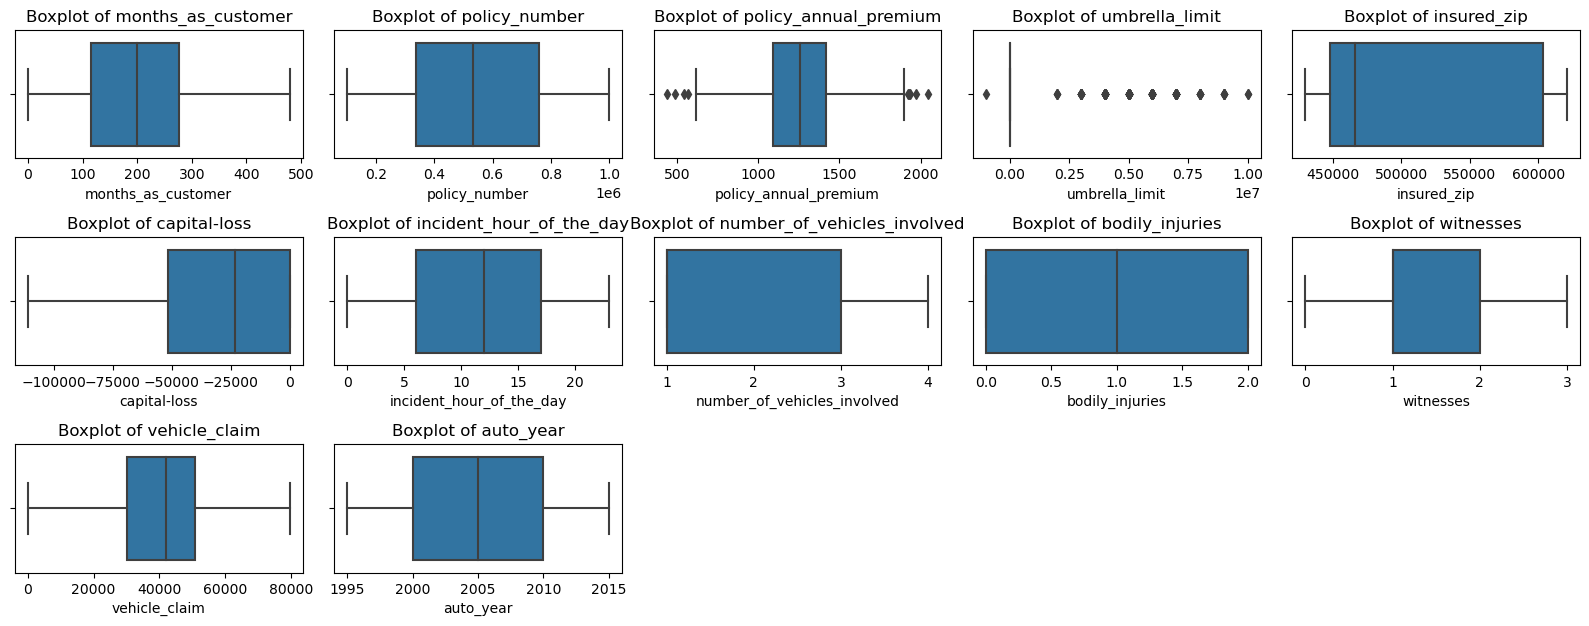

In [19]:
# Define numeric columns for boxplot
numeric_columns = df_copy.select_dtypes(include = ['int64', 'float64']).columns

# Create boxplots for each numeric column
plt.figure(figsize = (16, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x = df_copy[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

We can use the 5-number summary to address any outliers present in the dataset. As seen in the boxplots above we can see a huge amount of outliers present in the umbrella_limit column. 

### 5.5 Handling Outliers

In [20]:
# Calculate z-scores for each numeric column
z_scores = stats.zscore(df_copy.select_dtypes(include=['float64', 'int64']))

# Identify outliers based on a threshold
outliers = (z_scores > 3) | (z_scores < -3)

# Display number of outliers for each numeric column
print(pd.DataFrame(outliers, columns = df_copy.select_dtypes(include = ['float64', 'int64']).columns).sum())

months_as_customer              0
policy_number                   0
policy_annual_premium           3
umbrella_limit                 15
insured_zip                     0
capital-loss                    1
incident_hour_of_the_day        0
number_of_vehicles_involved     0
bodily_injuries                 0
witnesses                       0
vehicle_claim                   0
auto_year                       0
dtype: int64


Above we can see the following outliers present in the dataset:
- There are 3 outliers in the policy_annual_premium column.
- There are 15 outliers in the umbrella_limit column.
- There are 1 outlier in the capital-loss column.
- There are 1 outlier in the property_claim column.

In [21]:
# Correct outliers using Winsorize
winsorized_columns = ['policy_annual_premium', 'umbrella_limit', 'capital-loss', 'property_claim']
for col in winsorized_columns:
    df_copy[col] = winsorize(df_copy[col], limits = [0.05, 0.05])

In [22]:
# Calculate z-scores for each numeric column
z_scores = stats.zscore(df_copy.select_dtypes(include=['float64', 'int64']))

# Identify outliers based on threshold
outliers = (z_scores > 3) | (z_scores < -3)

# Display number of outliers for each numeric column
print(pd.DataFrame(outliers, columns = df_copy.select_dtypes(include = ['float64', 'int64']).columns).sum())

months_as_customer             0
policy_number                  0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
vehicle_claim                  0
auto_year                      0
dtype: int64


In [23]:
df_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


As seen above there are currently no outliers present in the dataframe.

# 6. Feature Engineering

Next we will be looking at the following:

- Handling Missing Values
- Binding Numeric Variables
- Correlation Matrix Using a Heatmap
- Creating New Features
- Feature Joining

### 6.1 Handling Missing Values

In [31]:
# Check for missing values
null_counts = df_copy.isnull().sum()
null_counts

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

There are currently no missing values in the dataframe as we have already removed and replaced them under the Data Cleaning section.

### 6.2 Binding Numeric Data

Next we introduced two additional columns: 'Age Category' and 'Customer Category' strategically crafted to streamline data representation and enhance clarity.

#### Creating Age Labels

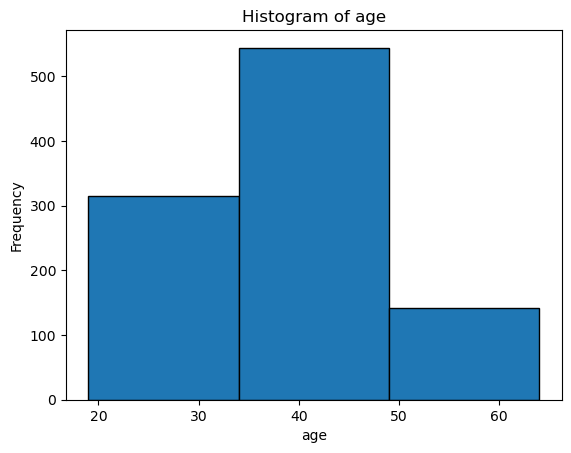

In [32]:
# Create a histogram for the "Age" column
column_name = 'age'

# Plot histogram
plt.hist(df_copy[column_name], bins = 3, edgecolor = 'black')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title(f'Histogram of {column_name}')

# Display histogram
plt.show()

The histogram above illustrates that the age group centered around 40, ranging from 35 to 48, experiences the highest frequency of occurrences, represented by the tallest bar. Conversely, the age range between 50 and 65 displays the lowest frequency, as indicated by a shorter bar on the histogram. Creating age bins would be a much better way in understanding and interpreting the data displayed above.

In [33]:
# Define bin edges
bin_edges = [0, 30, 55, 100]

# Corresponding labels for each bin
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']

# Create a new column based on bin labels
df_copy['ages_category'] = pd.cut(df_copy['age'], bins = bin_edges, labels = bin_labels)

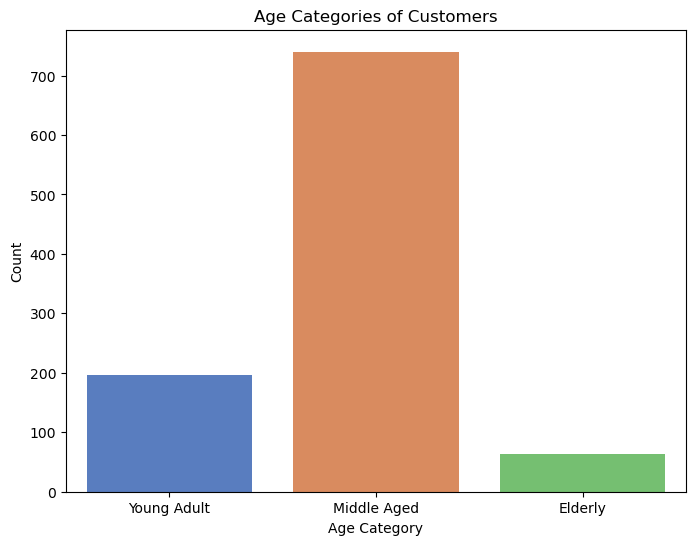

In [34]:
# Create a histogram for age categories
plt.figure(figsize = (8, 6))
sns.countplot(x = 'ages_category', data = df_copy, palette = 'muted')
plt.title('Age Categories of Customers')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

In the histogram depicting customer age categories, it's evident that the majority fall within the Middle-Aged category, while the elderly age group comprises the smallest portion of customers.

#### Creating Customer Labels

In [35]:
# Define bin edges
bin_edges_customer = [0, 25, 150, 500]

# Define labels for each bin
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  

# Create a new column based on bin labels
df_copy['customer_category'] = pd.cut(df_copy['months_as_customer'], bins = bin_edges_customer, labels = bin_labels_customer)

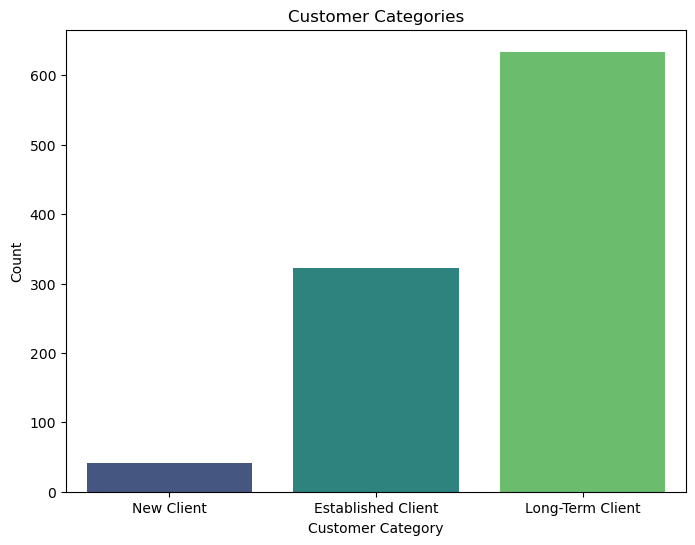

In [36]:
# Create a histogram for customer categories
plt.figure(figsize = (8, 6))
sns.countplot(x = 'customer_category', data = df_copy, palette = 'viridis')
plt.title('Customer Categories')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.show()

As seen above, the histogram illustrates that the majority of customers fall into the Long-Term Client category, while the representation of New Clients is notably lower.

In [37]:
df_copy.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,ages_category,customer_category
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,Middle Aged,Long-Term Client
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,Middle Aged,Long-Term Client
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,Young Adult,Established Client
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,Middle Aged,Long-Term Client
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,Middle Aged,Long-Term Client


### 6.3 Correlation Matrix Using a Heatmap

In [38]:
# Create Correlation Matrix
correlation_matrix = df_copy.select_dtypes(include = ['float64', 'int64']).corr()

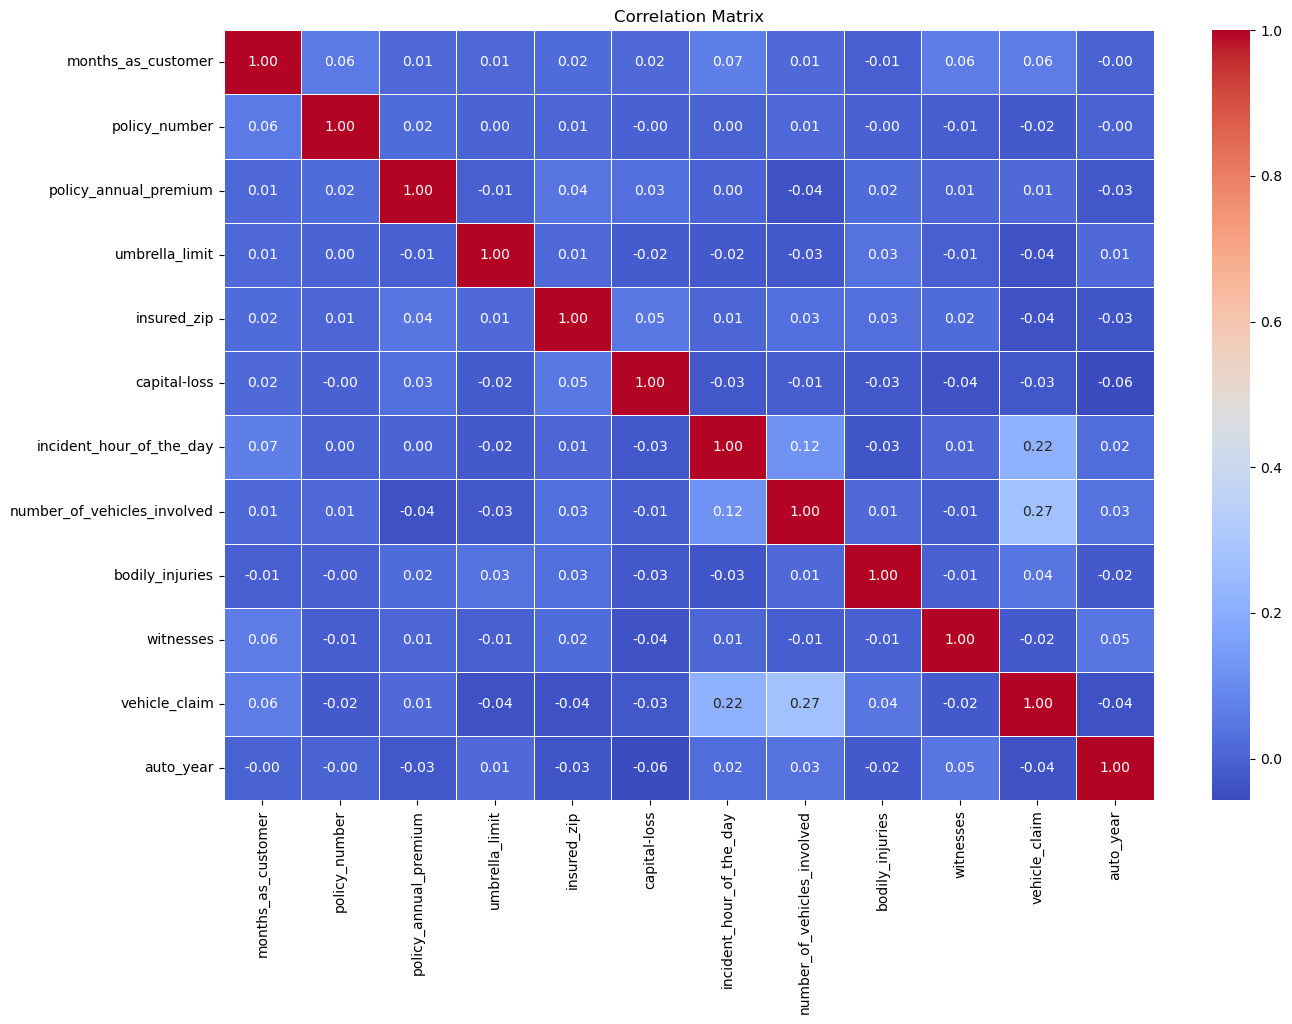

In [39]:
# Plot a heatmap based on the correlation matrix
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

### 6.4 Creating New Features

In [40]:
# Create a column 'Contract Years' and round off to two decimals
df_copy['Contract Years'] = df_copy['months_as_customer'] / 12
df_copy['Contract Years'] = df_copy['Contract Years'].round(2)

Above we have created a new feature called "Contract Year" which represents the duration of the policyholder's relationship with the insurance company in years

### 6.5 Feature Joining

#### Create a column Total Premiums Paid 

In [41]:
# Create a column 'total_premiums_paid' and round off to two decimals
df_copy['total_premiums_paid'] = (df_copy['policy_annual_premium'] / 12) * df_copy['months_as_customer']
df_copy['total_premiums_paid'] = df_copy['total_premiums_paid'].round(2)

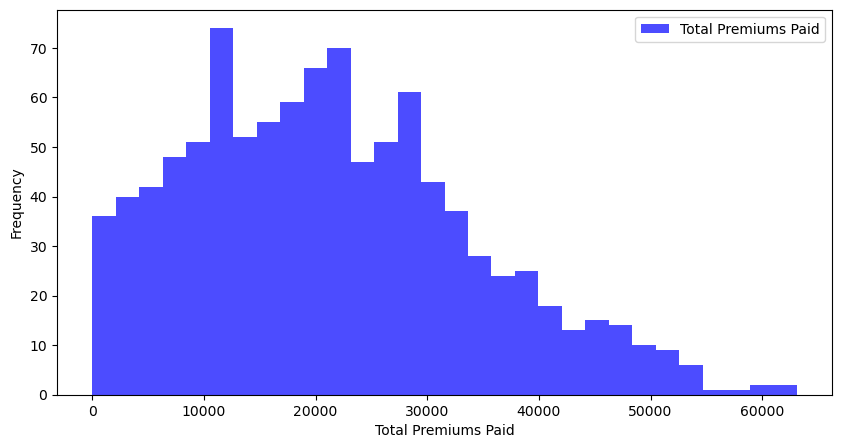

In [42]:
# Histogram for Total Premiums Paid
plt.figure(figsize = (10, 5))
plt.hist(df_copy['total_premiums_paid'], bins = 30, color = 'blue', alpha = 0.7, label = 'Total Premiums Paid')
plt.xlabel('Total Premiums Paid')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Create a column Net Value Of Customer

In [43]:
# Create a column 'net_value_of_customer' and round off to two decimals
df_copy['net_value_of_customer'] = df_copy['total_premiums_paid'] - df_copy['total_claim_amount']
df_copy['net_value_of_customer'] = df_copy['net_value_of_customer'].round(2)

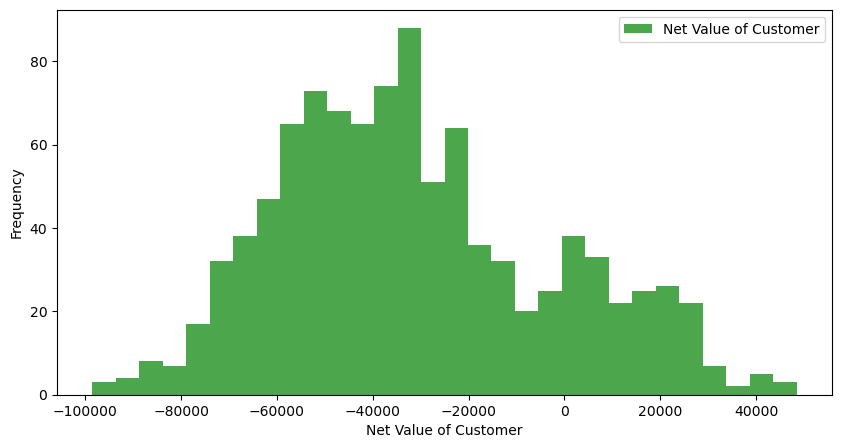

In [44]:
# Histogram for Net Value of Customer
plt.figure(figsize = (10, 5))
plt.hist(df_copy['net_value_of_customer'], bins = 30, color = 'green', alpha = 0.7, label = 'Net Value of Customer')
plt.xlabel('Net Value of Customer')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Above two new columns was created:

- Total Premiums Paid which represents the cumulative amount of premiums paid by each policyholder over their tenure.
- Net Value Of Customer which represents the net financial value of each customer by considering the difference between the premiums paid and any claims made.

# Saving the csv

In [46]:
# Save DataFrame to an Excel file
df_copy.to_excel('Advanced_Features_Claims_Data.xlsx', index = False)